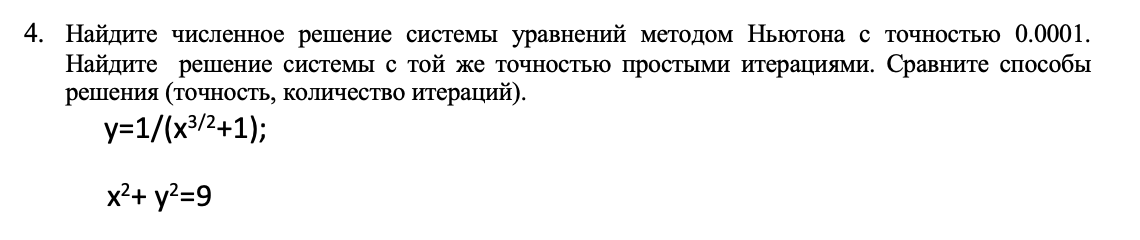

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


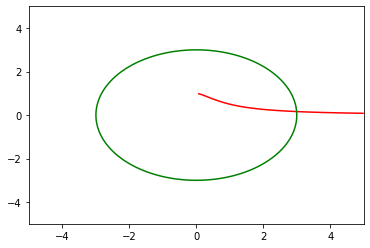

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(x,y)
F1 = 1/(X**(3/2)+1) - Y
F2 = X**2 + Y**2 - 9
plt.contour(X,Y,F1,[0], colors = 'red')
plt.contour(X,Y,F2,[0], colors = 'green')

plt.show()

In [ ]:
import numpy as np
import math
import sympy
from scipy.optimize import fsolve

x = sympy.Symbol('x')
y = sympy.Symbol('y')

def X(a):
    return (sympy.sqrt(9-y**2)).evalf(subs={y: a})

def Y(a):
    return (1/(x**(3/2)+1)).evalf(subs={x: a})

def equations(p):
    x, y = p
    return (y-1/(x**(3/2)+1), x**2+y**2-9)

def SIM(x_0, y_0, eps):
    
    cnt = 0

    while (abs(X(y_0)-x_0) > eps) or (abs(Y(x_0)-y_0) > eps):

      x_0 = X(y_0)
      y_0 = Y(x_0)
      cnt += 1
    return (x_0, y_0, cnt)

def NewthonMethod(x_0, y_0, eps, p):

    F = (y-1/(x**(3/2)+1), x**2+y**2-9)
    return (fsolve(equations, (x_0, y_0), full_output = True, xtol=eps))

x_0 = 1
y_0 = 1
eps = 1e-4

resultSIM = SIM(x_0, y_0, eps)
resultNewthonMethod = NewthonMethod(x_0, y_0, eps, 1)

print(f"Решение методом простых итераций: x: {resultSIM[0]}, y: {resultSIM[1]}, количество итераций: {resultSIM[2]}")
print(f"Решение методом Ньютона: x: {resultNewthonMethod[0][0]}, y: {resultNewthonMethod[0][1]}, количество итераций: {resultNewthonMethod[1]['nfev']}")
print(f"Разница в значениях x: {abs(resultSIM[0]-resultNewthonMethod[0][0])}, Разница в значениях y: {abs(resultSIM[1]-resultNewthonMethod[0][1])}")
print(f"Разница в количестве итераций: {abs(resultSIM[2] - resultNewthonMethod[1]['nfev'])}")

Решение методом простых итераций: x: 2.99563730605437, y: 0.161686142432414, количество итераций: 3
Решение методом Ньютона: x: 2.9956396821289735, y: 0.1616859732790076, количество итераций: 12
Разница в значениях x: 0.00000237607460240596, Разница в значениях y: 1.69153406892608E-7
Разница в количестве итераций: 9
